In [1]:
import altair as alt
import pandas as pd

# Create some data
data = pd.DataFrame({
    'x': [1, 2, 3, 4, 5],
    'y': [2, 4, 6, 8, 10]
})

# Create a chart
chart = alt.Chart(data).mark_line(point=True).encode(
    x='x',
    y='y'
)

chart.show()


alt.Chart(...)

In [7]:
graph=build_graph()

In [9]:
print(graph.get_graph())


Graph(nodes={'__start__': Node(id='__start__', name='__start__', data=RunnableCallable(tags=None, recurse=True, explode_args=False, func_accepts={}), metadata=None), 'sql_generator': Node(id='sql_generator', name='sql_generator', data=sql_generator(tags=None, recurse=True, explode_args=False, func_accepts={}), metadata=None), 'postprocess': Node(id='postprocess', name='postprocess', data=postprocess(tags=None, recurse=True, explode_args=False, func_accepts={}), metadata=None), 'clarify': Node(id='clarify', name='clarify', data=clarify(tags=None, recurse=True, explode_args=False, func_accepts={}), metadata=None), 'wants_data': Node(id='wants_data', name='wants_data', data=wants_data(tags=None, recurse=True, explode_args=False, func_accepts={}), metadata=None), 'route_after_sql_generator': Node(id='route_after_sql_generator', name='route_after_sql_generator', data=route_after_sql_generator(tags=None, recurse=True, explode_args=False, func_accepts={}), metadata=None), 'entry': Node(id='en

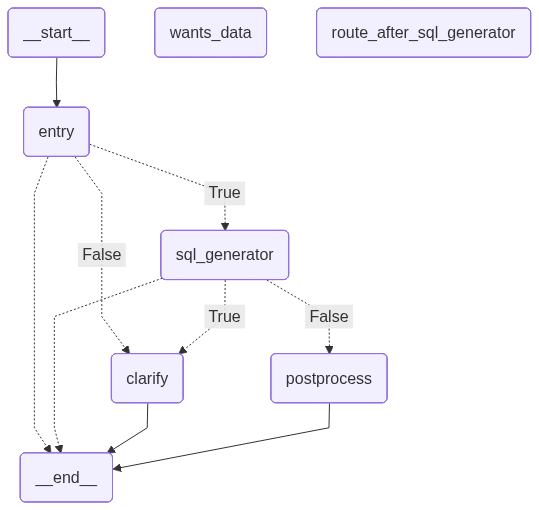

In [14]:
from IPython.display import Image, display

# 1️⃣ Build and compile the graph
graph = build_graph()     # If build_graph returns a compiled graph, no need to call .compile() again

# 2️⃣ Visualize the graph as PNG (Mermaid diagram)
display(Image(graph.get_graph().draw_mermaid_png()))


In [5]:
from langgraph.graph import StateGraph, END
from graph.state_schema import State
from langgraph.graph import StateGraph, START, END
# from graph.nodes.clarify import clarify
# from graph.nodes.sql_generator import sql_generator
# from graph.nodes.post_process import postprocess
# from graph.nodes.wants_data import wants_data
# from graph.nodes.route_after_sql_generator import route_after_sql_generator
from graph.nodes.entry import entry



def build_graph():
    graph_builder = StateGraph(state_schema=State)


    graph_builder.add_node("sql_generator", entry)
    graph_builder.add_node("postprocess",   entry)
    graph_builder.add_node("clarify",       entry)
    graph_builder.add_node("wants_data",    entry)
    graph_builder.add_node("route_after_sql_generator",entry)
    graph_builder.add_node("entry",         entry)

   

    # 3) Replace the two START→X edges with one conditional edge out of chatbot
    # graph_builder.add_edge(START, "chatbot")
    graph_builder.add_edge(START, "entry")  # entry point
    graph_builder.add_conditional_edges(
        "entry",
        entry,
        {
        True: "sql_generator",  # if router returns this
        False:       "clarify",        # if router returns this
        END:              END              # allow router to short-circuit to END if desired
        }
    )

    graph_builder.add_conditional_edges(
        "sql_generator",
        entry,
        {
            True: "clarify",
            False: "postprocess",
            END:    END
        }
    )

    # 4) Chain your SQL path so it loops back into chatbot
    # graph_builder.add_edge("sql_generator", "postprocess")      # for SAP_HANA
    graph_builder.add_edge("postprocess",   END)
    graph_builder.add_edge("clarify",       END)


    return graph_builder.compile()
